In [2]:
from scipy.stats import entropy, kurtosis

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import json
import glob

## Benign Behaviour

In [3]:
df = pd.read_csv("/Users/c22105357/Documents/gotham-network-packet-labeller/data/raw/normal/all_benign_data.txt", sep=";")
df["device_type"] = df["device"].apply(lambda x: re.match(r"([a-zA-Z\-]+)-([0-9]+)", x).group(1))
df['timestamp'] = df['timestamp'].astype(float).astype(int)

In [3]:
df.groupby("device_type")['packet_size'].describe()

,count,mean,std,min,25%,50%,75%,max
device_type,,,,,,,,
iotsim-air-quality,2746.0,76.505462,86.825152,42.0,42.0,76.0,90.0,1297.0
iotsim-building-monitor,12351.0,85.588211,112.259619,42.0,66.0,77.0,90.0,1514.0
iotsim-city-power,1360.0,55.105147,33.426646,42.0,42.0,42.0,62.0,593.0
iotsim-combined-cycle,21808.0,56.117388,33.195302,42.0,42.0,42.0,70.0,502.0
iotsim-combined-cycle-tls,19113.0,72.200439,34.902511,42.0,42.0,70.0,93.0,474.0
iotsim-cooler-motor,334726.0,113.879131,55.185692,42.0,66.0,68.0,164.0,1514.0
iotsim-domotic-monitor,13862.0,74.538667,78.685281,42.0,42.0,76.0,90.0,1514.0
iotsim-hydraulic-system,72282.0,256.135552,481.863851,42.0,42.0,67.0,90.0,1514.0
iotsim-ip-camera-museum,1196982.0,1399.678916,306.801809,42.0,1514.0,1514.0,1514.0,1514.0


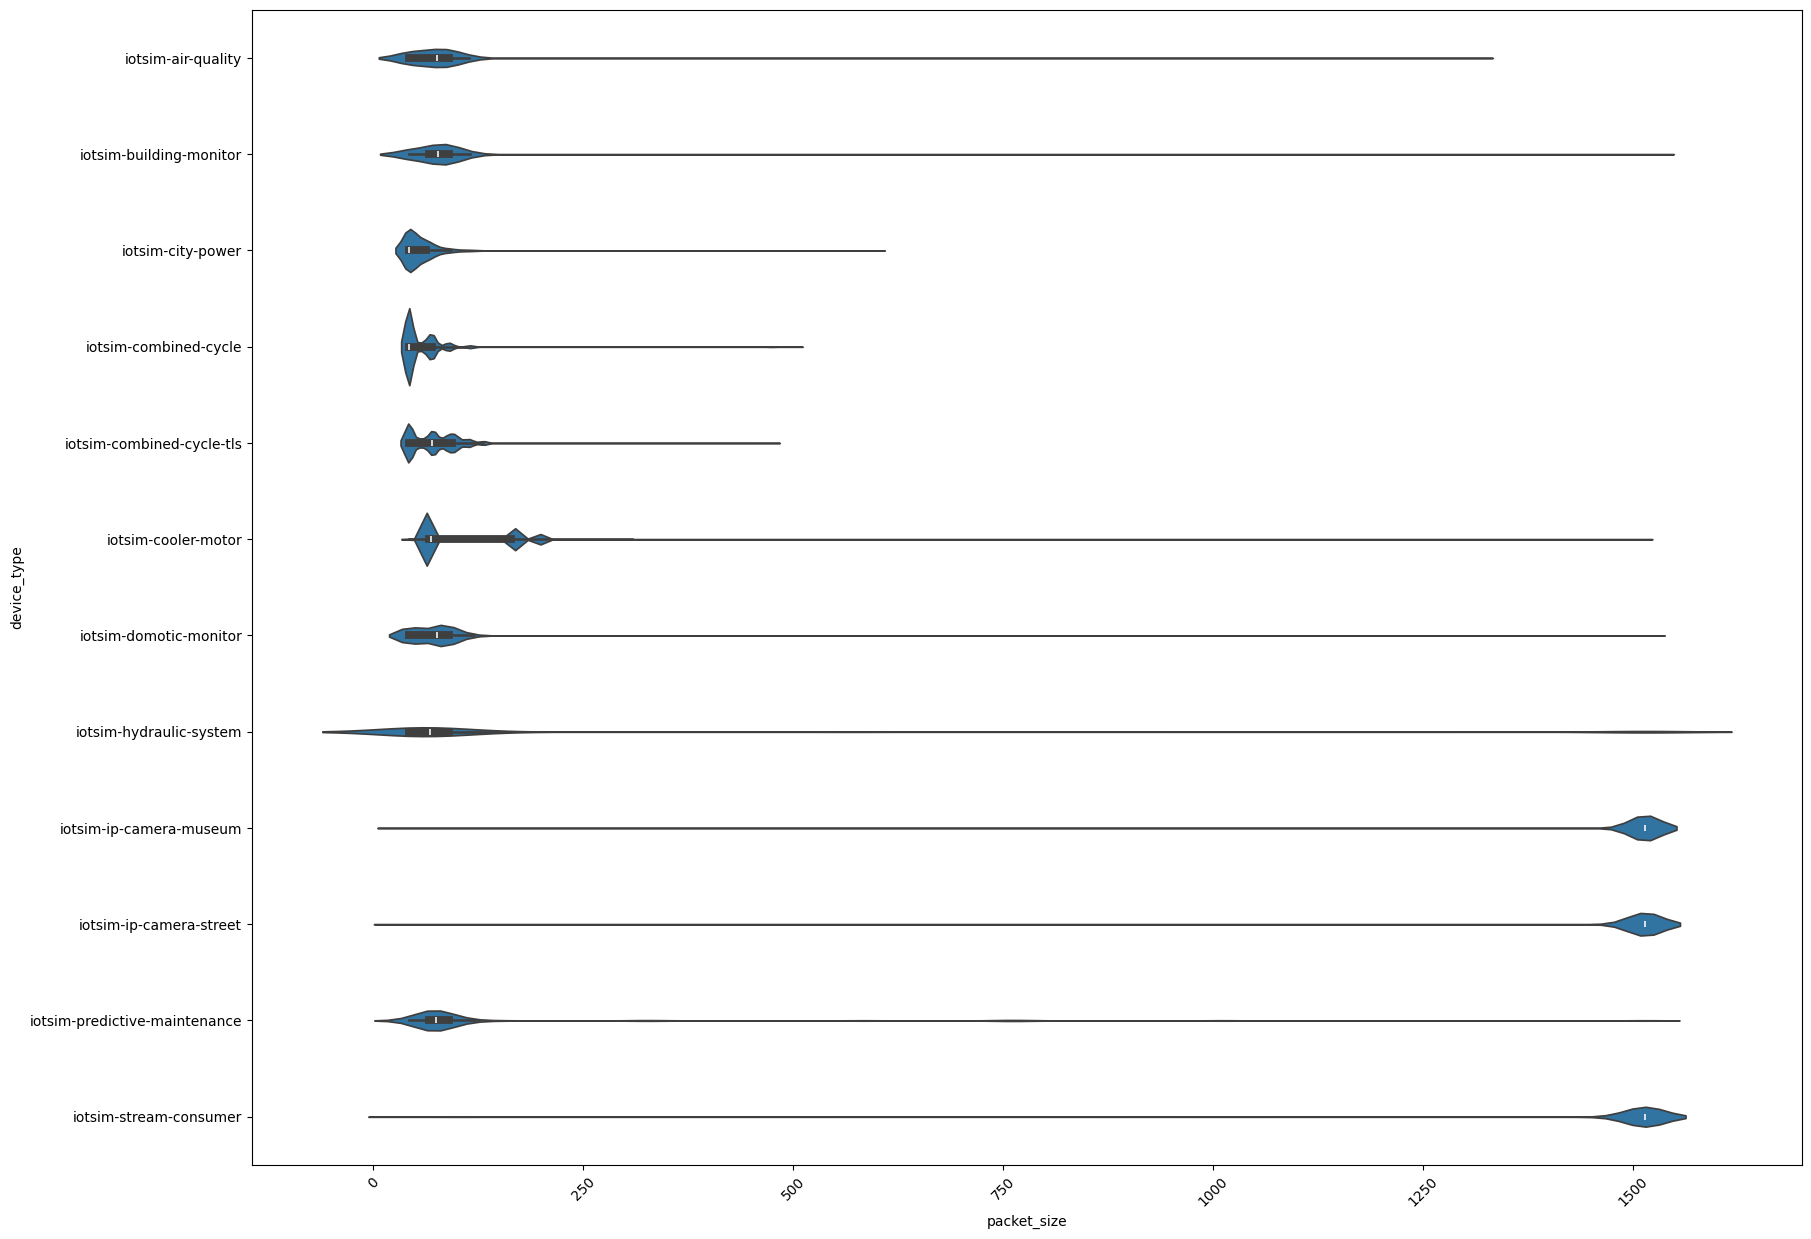

In [36]:
plt.figure(figsize=(20, 15))
plt.xticks(rotation=45)
ax = sns.violinplot(y=df["device_type"], x=df["packet_size"])

### IoT Device Type

In [4]:
number_of_device = df.device.nunique()
number_of_device_types = df.device_type.nunique()
packet_distribution_per_device = df.device.value_counts()
packet_distribution_per_device_type = df.device_type.value_counts()
bytes_transmitted_per_device = df.groupby("device_type")["packet_size"].sum()

### Protocols

In [42]:
packets_per_protocol = df.protocol.value_counts()
packets_per_protocol_per_device = df.groupby("device_type")['protocol'].value_counts()

### Traffic Volume Pattern

In [17]:
data.shape

(4814, 9)

In [21]:
(data['protocol'] == "MQTT").sum().sum()

np.int64(606)

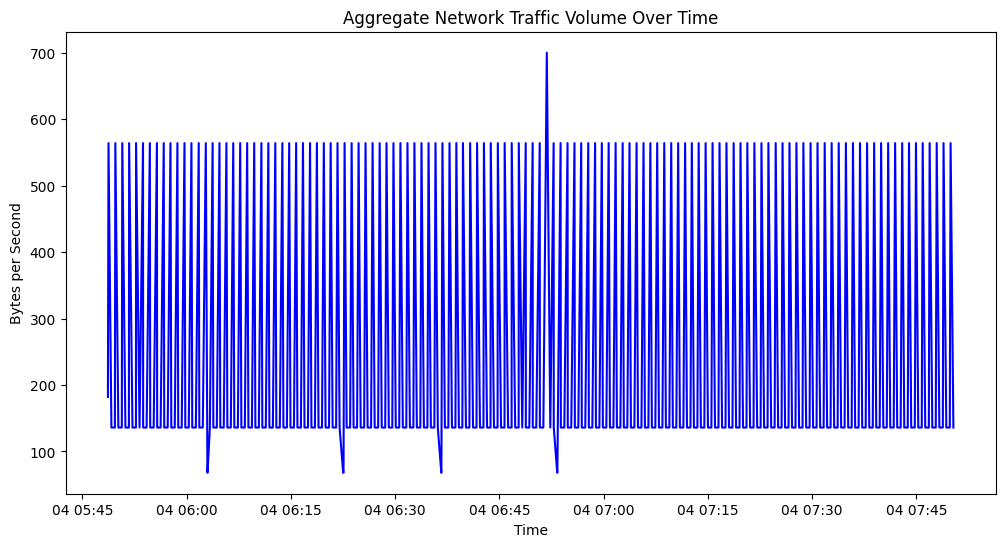

In [22]:
data = df[(df.device == "iotsim-hydraulic-system-9_0-0_to_OpenvSwitch-15_9-0.pcap")]
data = data[(data.src_ip == "192.168.20.38") | (data.dst_ip == "192.168.20.38")]
data = data[data['protocol'] == "MQTT"]

# Group by timestamp (per second) and sum packet sizes within each second
traffic_volume = data.groupby('timestamp')['packet_size'].sum().reset_index()
traffic_volume.columns = ['timestamp', 'bytes_per_second']

# Convert timestamp to datetime for easier plotting
traffic_volume['timestamp'] = pd.to_datetime(traffic_volume['timestamp'], unit='s')

# Plot traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(traffic_volume['timestamp'], traffic_volume['bytes_per_second'], color='blue')
plt.title("Aggregate Network Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Bytes per Second")
plt.show()

## Always Open – Continuous

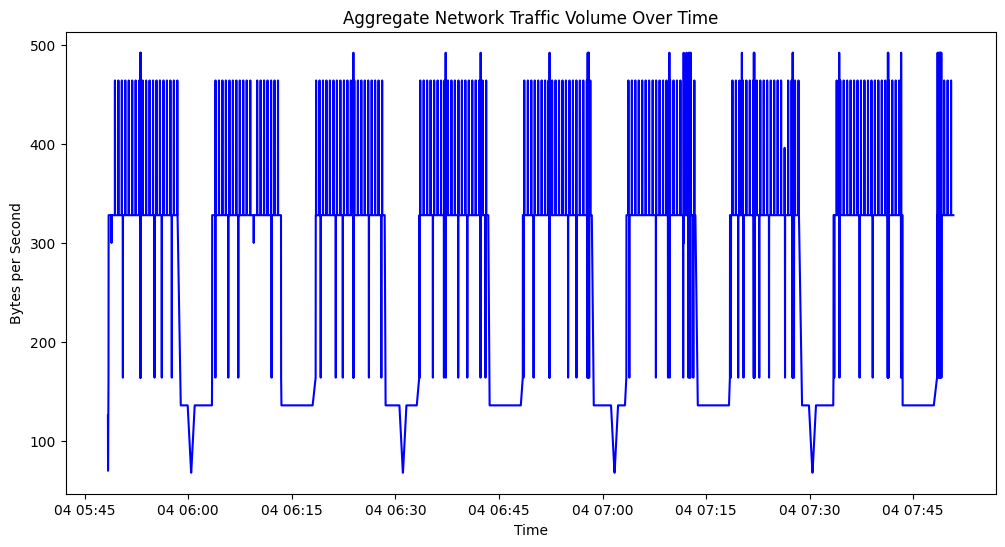

In [26]:
data = df[df.device == "iotsim-cooler-motor-8_0-0_to_OpenvSwitch-18_8-0.pcap"]
data = data[(data.src_ip == "192.168.19.17") | (data.dst_ip == "192.168.19.17")]
data = data[data['protocol'] == "MQTT"]

# Group by timestamp (per second) and sum packet sizes within each second
traffic_volume = data.groupby('timestamp')['packet_size'].sum().reset_index()
traffic_volume.columns = ['timestamp', 'bytes_per_second']

# Convert timestamp to datetime for easier plotting
traffic_volume['timestamp'] = pd.to_datetime(traffic_volume['timestamp'], unit='s')

# Plot traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(traffic_volume['timestamp'], traffic_volume['bytes_per_second'], color='blue')
plt.title("Aggregate Network Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Bytes per Second")
plt.show()

## Always Open – Intermittent

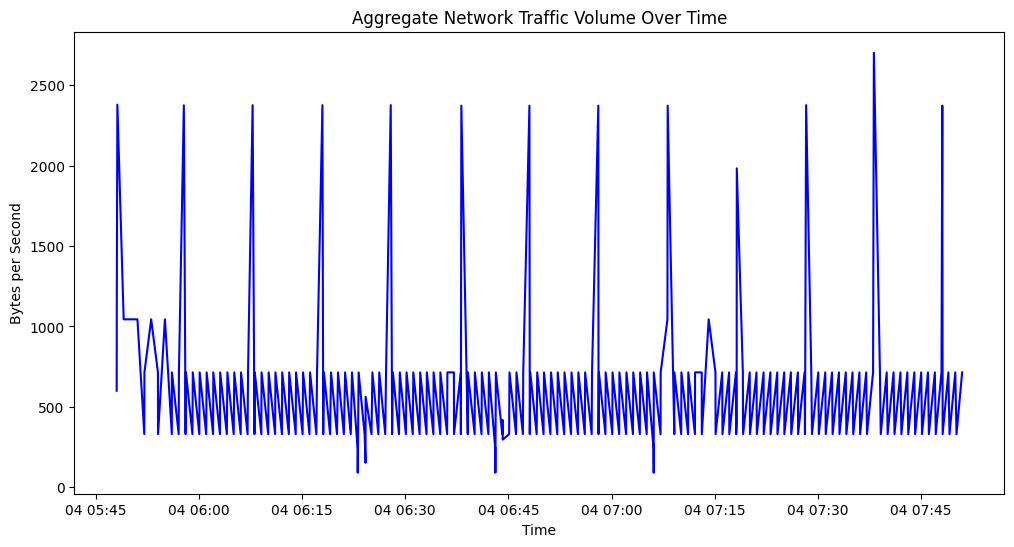

In [32]:
data = df[df.device == "iotsim-air-quality-1_0-0_to_OpenvSwitch-25_1-0.pcap"]
data = data[(data.src_ip == "192.168.18.17") | (data.dst_ip == "192.168.18.17")]

# Group by timestamp (per second) and sum packet sizes within each second
traffic_volume = data.groupby('timestamp')['packet_size'].sum().reset_index()
traffic_volume.columns = ['timestamp', 'bytes_per_second']

# Convert timestamp to datetime for easier plotting
traffic_volume['timestamp'] = pd.to_datetime(traffic_volume['timestamp'], unit='s')

# Plot traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(traffic_volume['timestamp'], traffic_volume['bytes_per_second'], color='blue')
plt.title("Aggregate Network Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Bytes per Second")
plt.show()

## Open Close – Continuous

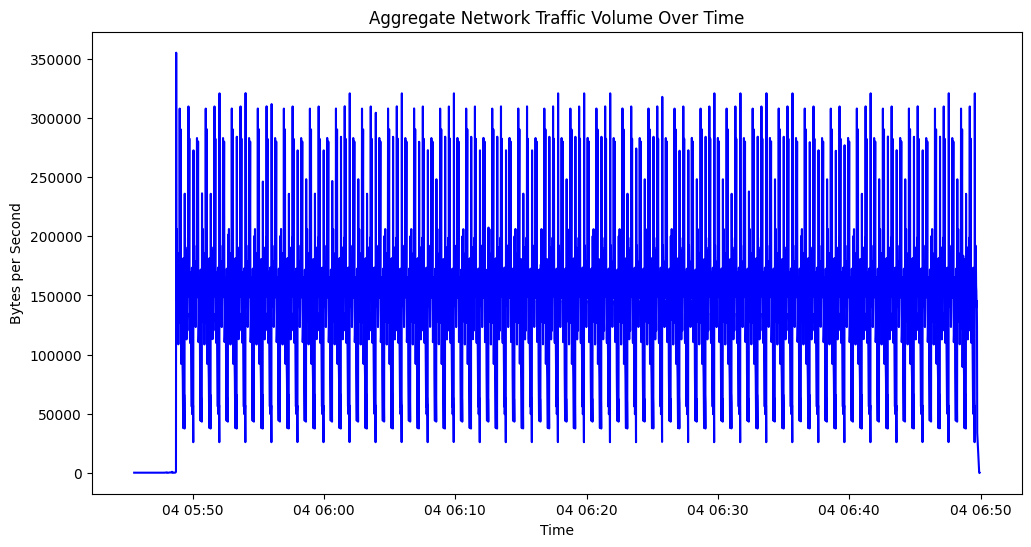

In [81]:
data = df[df.device == "iotsim-ip-camera-street-2_0-0_to_OpenvSwitch-24_2-0.pcap"]

# Group by timestamp (per second) and sum packet sizes within each second
traffic_volume = data.groupby('timestamp')['packet_size'].sum().reset_index()
traffic_volume.columns = ['timestamp', 'bytes_per_second']

# Convert timestamp to datetime for easier plotting
traffic_volume['timestamp'] = pd.to_datetime(traffic_volume['timestamp'], unit='s')

# Plot traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(traffic_volume['timestamp'], traffic_volume['bytes_per_second'], color='blue')
plt.title("Aggregate Network Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Bytes per Second")
plt.show()

In [60]:
df.groupby("device_type")['packet_size'].value_counts()
## boxplot (min, max, q1, q3)
## packet information per iot device type: x (iot device type) and y (packet size)
## same for flow duration: x (iot device type) and y (flow duration)

device_type             packet_size
iotsim-air-quality      42             880
                        76             414
                        90             276
                        98             250
                        92             138
                                      ... 
iotsim-stream-consumer  251              2
                        306              1
                        342              1
                        443              1
                        577              1
Name: count, Length: 1545, dtype: int64

In [ ]:
data = df[df.device_type == "iotsim-air-quality"]

# Group by timestamp (per second) and sum packet sizes within each second
traffic_volume = data.groupby('timestamp')['packet_size'].sum().reset_index()
traffic_volume.columns = ['timestamp', 'bytes_per_second']

# Convert timestamp to datetime for easier plotting
traffic_volume['timestamp'] = pd.to_datetime(traffic_volume['timestamp'], unit='s')

# Plot traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(traffic_volume['timestamp'], traffic_volume['bytes_per_second'], color='blue')
plt.title("Aggregate Network Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Bytes per Second")
plt.show()

In [38]:
# General Packet Statistics

## Total Packets: Number of packets in the dataset.
total_packets = df.shape[0]
#print(f"Total Number of Packets: {total_packets}\n\n")

## Packet Count by Protocol: Total packets for each protocol (e.g., TCP, UDP, ICMP).
packets_per_protocol = df.protocol.value_counts()
#print(f"Total Number of Protocols: {df.protocol.nunique()}\n\n")
#print(f"Protocols: {df.protocol.unique()}\n\n")

## Average Packet Size: Mean size of packets.
#size_packet_info = df.packet_size.describe()
average_packet_size = df.packet_size.mean()
total_bytes = df.packet_size.sum()

## Protocol Distribution: Distribution of packets across protocols as a percentage of the total packet count


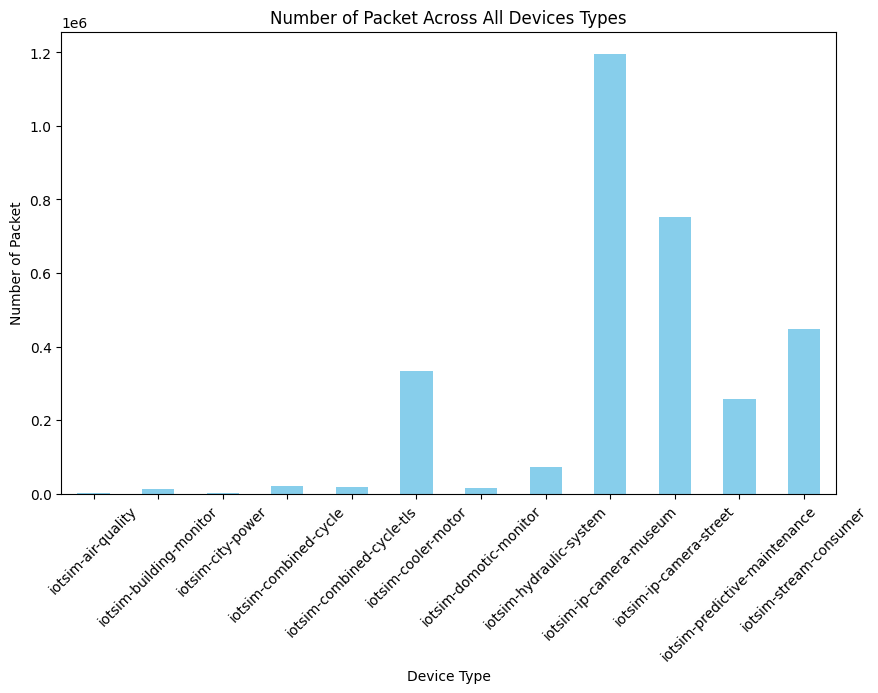

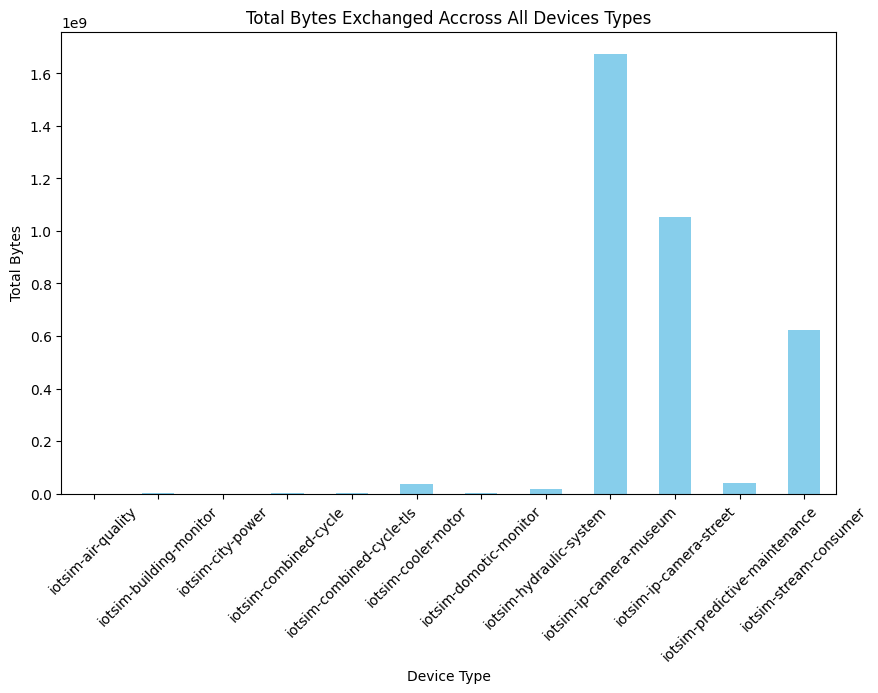

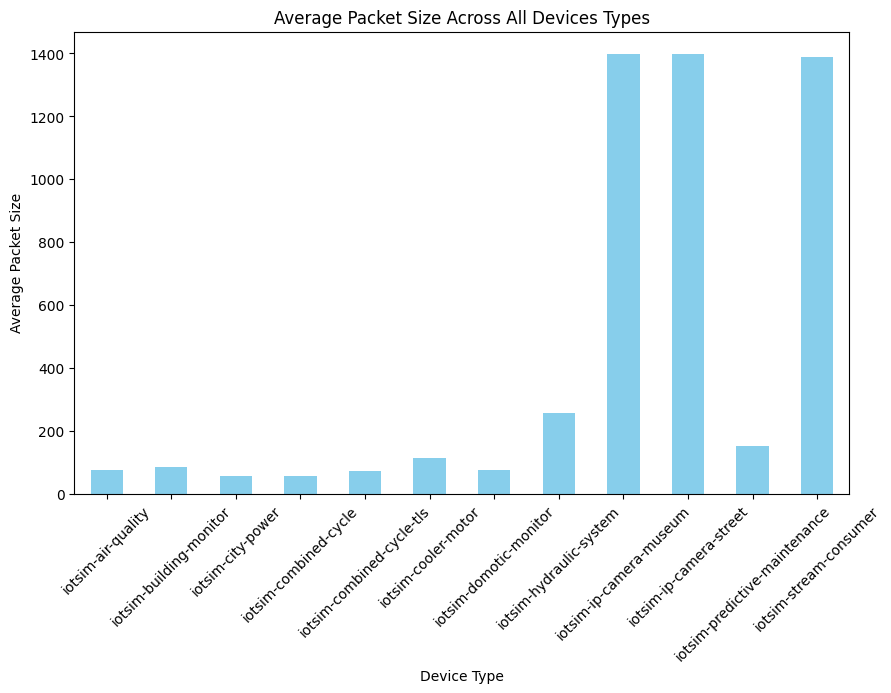

In [22]:
# Plot protocol distribution
plt.figure(figsize=(10, 6))
df.groupby("device_type")["packet_size"].count().plot(kind='bar', color='skyblue')
plt.title("Number of Packet Across All Devices Types")
plt.xlabel("Device Type")
plt.ylabel("Number of Packet")
plt.xticks(rotation=45)
plt.show()

# Plot protocol distribution
plt.figure(figsize=(10, 6))
df.groupby("device_type")["packet_size"].sum().plot(kind='bar', color='skyblue')
plt.title("Total Bytes Exchanged Accross All Devices Types")
plt.xlabel("Device Type")
plt.ylabel("Total Bytes")
plt.xticks(rotation=45)
plt.show()

# Plot protocol distribution
plt.figure(figsize=(10, 6))
df.groupby("device_type")["packet_size"].mean().plot(kind='bar', color='skyblue')
plt.title("Average Packet Size Across All Devices Types")
plt.xlabel("Device Type")
plt.ylabel("Average Packet Size")
plt.xticks(rotation=45)
plt.show()

# Identify unique flows by grouping
# A flow is identified by src_ip, dst_ip, src_port, dst_port, and protocol
df.dropna(axis=0, inplace=True)
df['timestamp'] = df['timestamp'].astype(float)
flows = df.groupby(['device_type', 'src_ip', 'dst_ip', 'protocol', 'src_port', 'dst_port'])

In [ ]:
# Packet Analysis |

## Traffic Volume
## Top Protocols
## Top Ports
## Top IoT Device (IP-address)
## Packets per Second
## Packet Length
## 

# Flow Analysis |

## # of Flows
## # Packets per Flow
## Flow Duration
## 


### Attack Types

In [4]:
def extract_device_info(filename: str):
    """Extract the IoT device type and its corresponding number from the filename."""
    match = re.match(r"([a-zA-Z\-]+)-([0-9]+)", filename)
    if match:
        return match.group(1), match.group(2)  # (device_name, device_number)
    return None, None

def load_metadata(metadata_file: str):
    """Load metadata rules from a JSON file."""
    with open(metadata_file, 'r') as f:
        return json.load(f)

In [5]:
normal_metadata_file = '../metadata/metadata-normal.json'
normal_metadata = load_metadata(normal_metadata_file)

In [6]:
df_list = []
iot_devices = [device.split('/')[-1] for device in glob.glob(f"../*/extracted_features/normal/*.csv")]
for iot_device in iot_devices:
    device_name, device_number = extract_device_info(iot_device)
    device_number = int(device_number) - 1  # Convert to index (0-based)
    device_normal_metadata = normal_metadata.get(device_name, {})
    device_ip_address = device_normal_metadata.get("device_ip", [])[device_number]
    
    filenames_malicious = glob.glob(f"../*/labelled/malicious/*/{iot_device}")
    filenames_normal = glob.glob(f"../*/extracted_features/normal/{iot_device}")

    df_normal = pd.concat([pd.read_csv(filename, sep=";", low_memory=False) for filename in filenames_normal])

    df_normal['label'] = 'Normal'
    df_normal['ip.src'] = df_normal['ip.src'].fillna('')
    df_normal['ip.dst'] = df_normal['ip.dst'].fillna('')
    df_normal['device'] = iot_device
    mask = np.logical_or(df_normal["ip.src"].str.match(device_ip_address), df_normal["ip.dst"].str.match(device_ip_address))
    df_normal = df_normal[mask]
    
    df_malicious = None
    if filenames_malicious:
        df_malicious = pd.concat([pd.read_csv(filename, sep=";", low_memory=False) for filename in filenames_malicious])
        df_malicious['device'] = iot_device
  
    df_list.extend([df_normal, df_malicious])

df = pd.concat(df_list)

KeyError: 'ip.src'

In [153]:
a = df.groupby('device')['label'].value_counts().unstack()
a = a.fillna(0)
a = a.drop("Unknown", axis=1)
# a['Benign'] = a['Normal'] / a.sum(axis=1)
# a['Malicious'] = 1 - a['Benign']

In [155]:
for col in a.columns:
    a[col] = a[col] / a.sum(axis=1)

In [ ]:
import re
re.match()

In [189]:
(df['label'] == "Normal").sum() / 31591689

np.float64(0.21752521683788417)

In [1]:
plt.figure(figsize=(40, 8))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(a.T, cmap=cmap, cbar_kws={"shrink": .3},vmax=.3, center=0,
             linewidths=.5)

NameError: name 'plt' is not defined

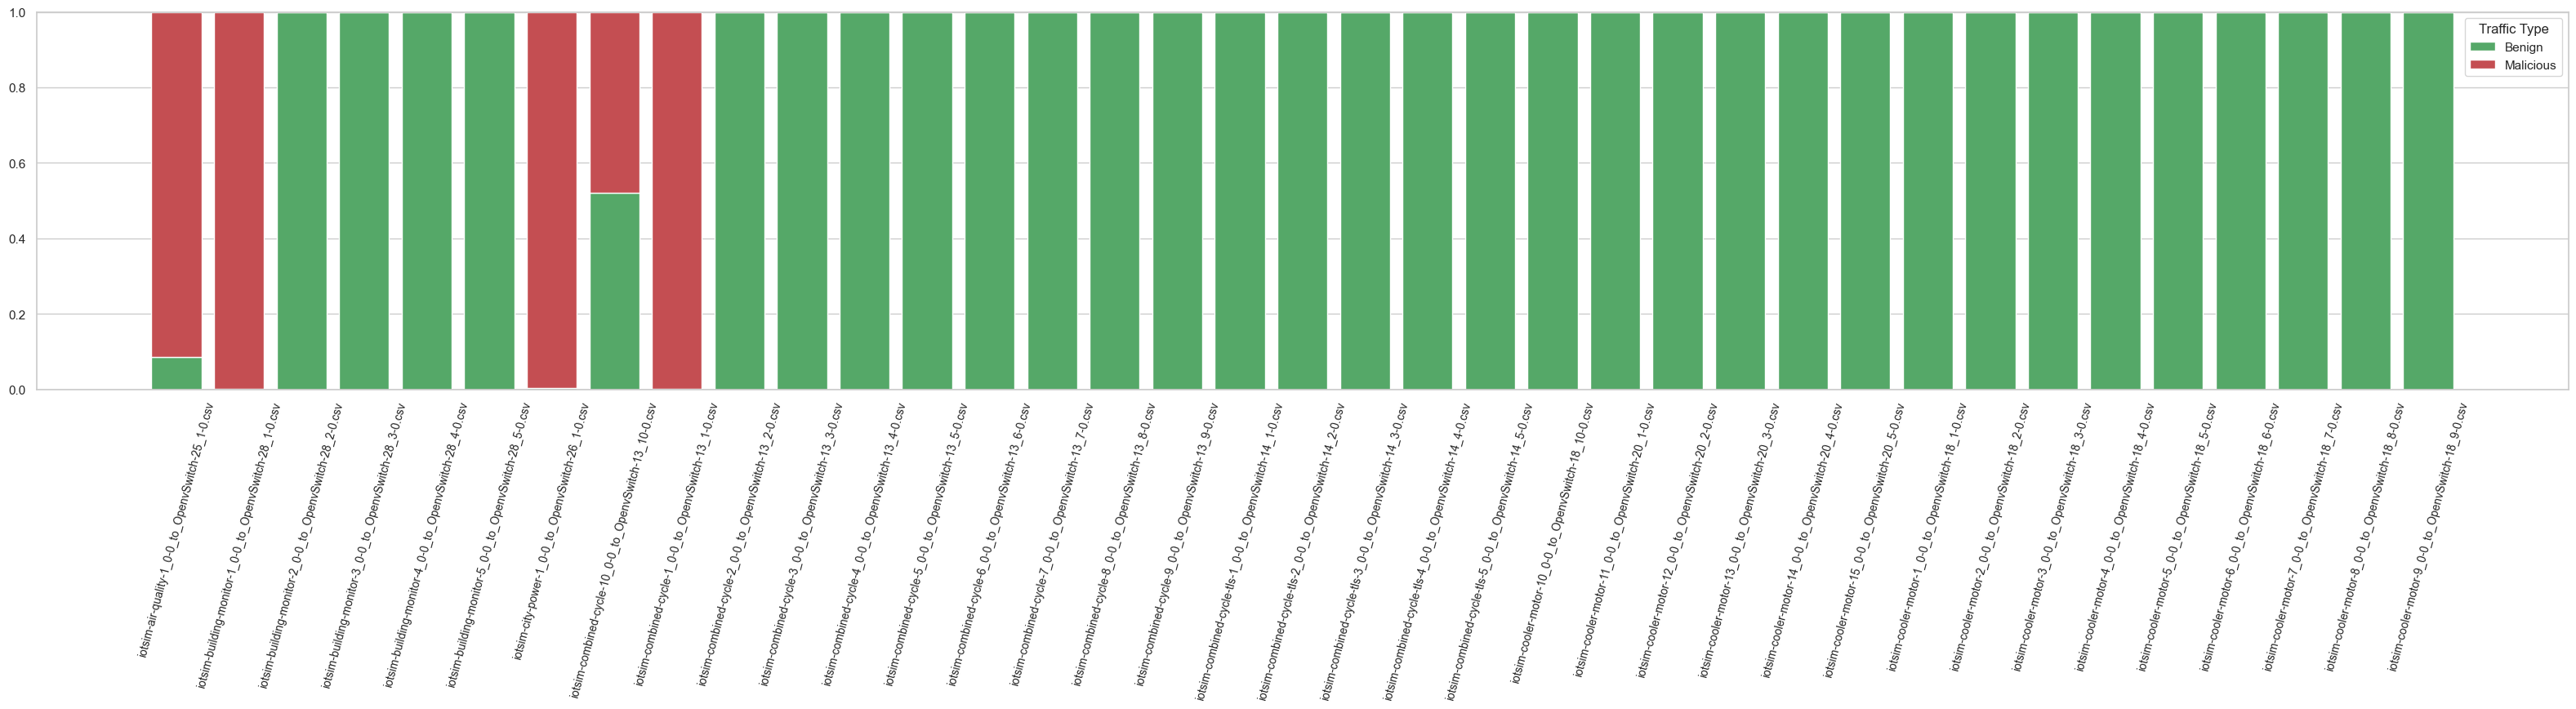

In [ ]:
import matplot lib.pyplot as plt

sns.set_theme(style="whitegrid")
b = a.iloc[:37]
plt.figure(figsize=(40, 6))
plt.bar(list(b.index), b['Benign'].values, color='g', label='Benign')
plt.bar(list(b.index), b['Malicious'].values, bottom=b['Benign'].values, color='r', label='Malicious')

plt.xticks(rotation=75, fontsize=10)
plt.legend(title='Traffic Type')
plt.show()

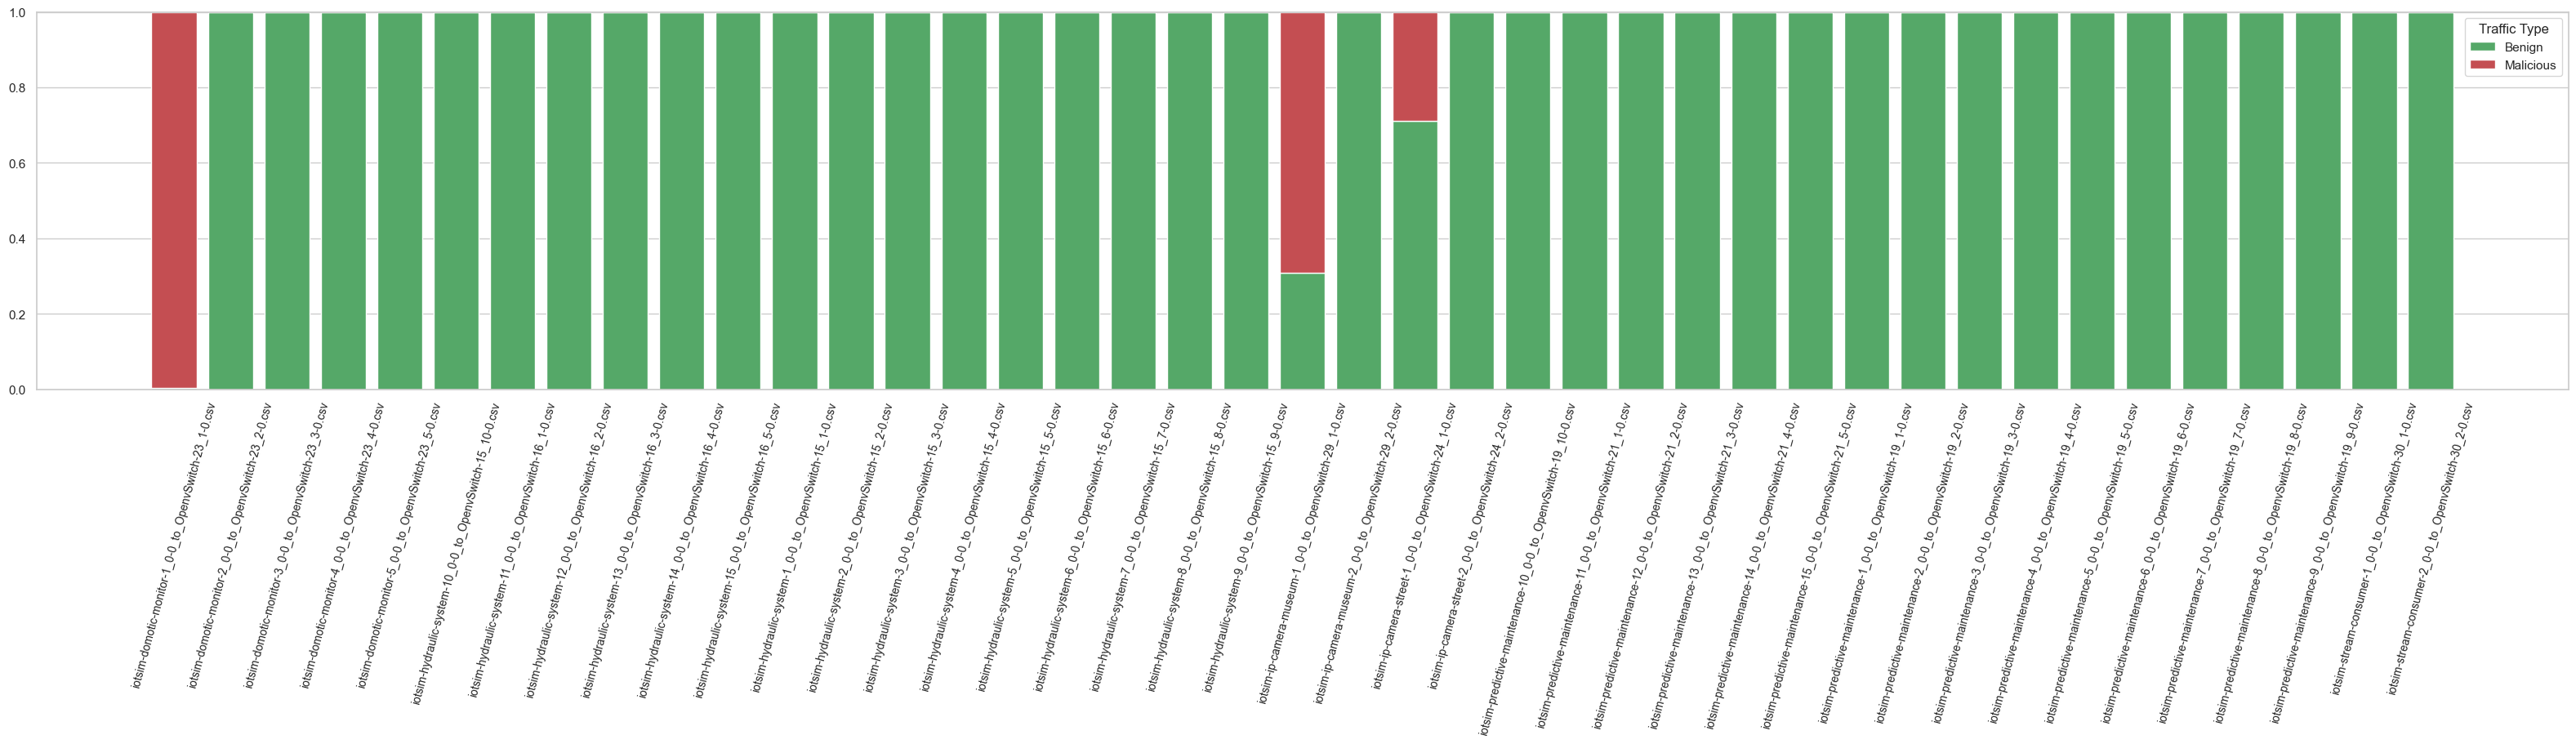

In [147]:
sns.set_theme(style="whitegrid")
b = a.iloc[37:]
plt.figure(figsize=(40, 6))
plt.bar(list(b.index), b['Benign'].values, color='g', label='Benign')
plt.bar(list(b.index), b['Malicious'].values, bottom=b['Benign'].values, color='r', label='Malicious')

plt.xticks(rotation=75, fontsize=10)
plt.legend(title='Traffic Type')
plt.show()

In [152]:
a

label,C&C Communication,CoAP Amplification,File Download,Ingress Tool Transfer,Merlin C&C Communication,Merlin ICMP Flooding,Merlin TCP Flooding,Merlin UDP Flooding,Mirai C&C Communication,Mirai GRE Flooding,Mirai TCP Flooding,Mirai UDP Flooding,Normal,Reporting,TCP Scan,Telnet Brute Force,UDP Scan,Benign,Malicious
device,,,,,,,,,,,,,,,,,,,
iotsim-air-quality-1_0-0_to_OpenvSwitch-25_1-0.csv,38.0,0.0,1178.0,1272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6140.0,8.0,39290.0,24035.0,0.0,0.085324,0.914676
iotsim-building-monitor-1_0-0_to_OpenvSwitch-28_1-0.csv,58.0,0.0,1183.0,2486.0,8859.0,5283.0,11963.0,5000.0,252.0,1719129.0,1560145.0,2722790.0,2820.0,8.0,68218.0,38483.0,0.0,0.000459,0.999541
iotsim-building-monitor-2_0-0_to_OpenvSwitch-28_2-0.csv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1718.0,0.0,0.0,0.0,0.0,1.000000,0.000000
iotsim-building-monitor-3_0-0_to_OpenvSwitch-28_3-0.csv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1718.0,0.0,0.0,0.0,0.0,1.000000,0.000000
iotsim-building-monitor-4_0-0_to_OpenvSwitch-28_4-0.csv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1718.0,0.0,0.0,0.0,0.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iotsim-predictive-maintenance-7_0-0_to_OpenvSwitch-19_7-0.csv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13132.0,0.0,0.0,0.0,0.0,1.000000,0.000000
iotsim-predictive-maintenance-8_0-0_to_OpenvSwitch-19_8-0.csv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13113.0,0.0,0.0,0.0,0.0,1.000000,0.000000
iotsim-predictive-maintenance-9_0-0_to_OpenvSwitch-19_9-0.csv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11750.0,0.0,0.0,0.0,0.0,1.000000,0.000000


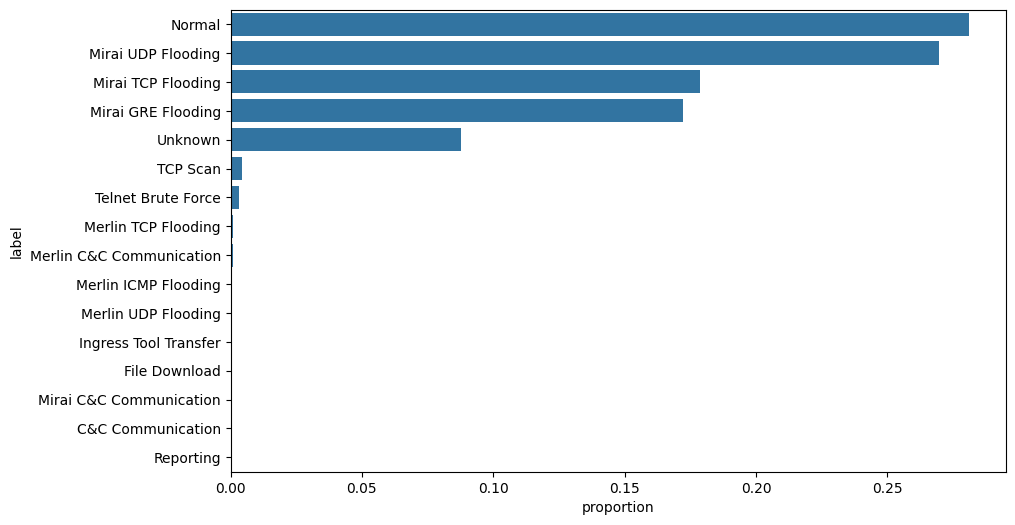

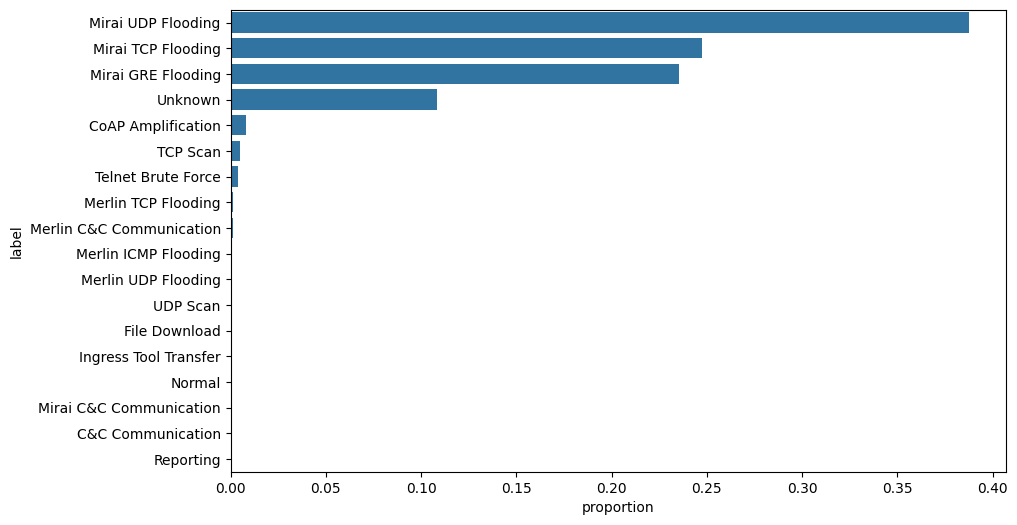

In [22]:
plt.figure(figsize=(10, 6))
x = df[df.device == "iotsim-ip-camera-museum-1_0-0_to_OpenvSwitch-29_1-0.csv"].label.value_counts(normalize=True).reset_index()
sns.barplot(x="proportion", y="label", data=x)
plt.savefig("network_traffic_10.png")

plt.figure(figsize=(10, 6))
x = df[df.device == "iotsim-combined-cycle-1_0-0_to_OpenvSwitch-13_1-0.csv"].label.value_counts(normalize=True).reset_index()
sns.barplot(x="proportion", y="label", data=x)
plt.savefig("network_traffic_11.png")

In [6]:
for label in df.label.unique():
    print(label)
    print(df[df.label == label]['device'].value_counts())

Normal
device
iotsim-ip-camera-museum-1_0-0_to_OpenvSwitch-29_1-0.csv    2945091
iotsim-ip-camera-street-1_0-0_to_OpenvSwitch-24_1-0.csv    1870061
iotsim-ip-camera-museum-2_0-0_to_OpenvSwitch-29_2-0.csv     598252
iotsim-ip-camera-street-2_0-0_to_OpenvSwitch-24_2-0.csv     375692
iotsim-stream-consumer-1_0-0_to_OpenvSwitch-30_1-0.csv      223919
                                                            ...   
iotsim-combined-cycle-3_0-0_to_OpenvSwitch-13_3-0.csv          216
iotsim-combined-cycle-7_0-0_to_OpenvSwitch-13_7-0.csv          216
iotsim-combined-cycle-6_0-0_to_OpenvSwitch-13_6-0.csv          216
iotsim-combined-cycle-5_0-0_to_OpenvSwitch-13_5-0.csv          201
iotsim-combined-cycle-4_0-0_to_OpenvSwitch-13_4-0.csv          145
Name: count, Length: 78, dtype: int64
TCP Scan
device
iotsim-building-monitor-1_0-0_to_OpenvSwitch-28_1-0.csv    68218
iotsim-ip-camera-museum-1_0-0_to_OpenvSwitch-29_1-0.csv    45849
iotsim-air-quality-1_0-0_to_OpenvSwitch-25_1-0.csv         39290


In [35]:
# For discrete values (categories)
for label in df.label.unique():
    print(label)
    probs = df[df.label == label]['device'].value_counts(normalize=True)
    entropy_value = entropy(probs)
    print(entropy_value)

Normal
1.8799142976043606
TCP Scan
1.930129208823218
Telnet Brute Force
1.9350407975576867
Ingress Tool Transfer
1.8876884183337141
File Download
1.942492588392144
C&C Communication
1.9266852717057985
Reporting
1.7478680974667578
Unknown
1.1035405297061127
Merlin ICMP Flooding
1.417206664602439
Merlin UDP Flooding
1.5499520697143323
Merlin TCP Flooding
1.6480215363151767
Mirai UDP Flooding
1.3645818685349227
Mirai TCP Flooding
1.4806096512571074
Mirai GRE Flooding
1.3783491622694921
Merlin C&C Communication
1.0986061590252811
Mirai C&C Communication
1.0979819294569768
UDP Scan
0.0
CoAP Amplification
0.0


Normal
TCP Scan


ValueError: array length 78 does not match index length 8

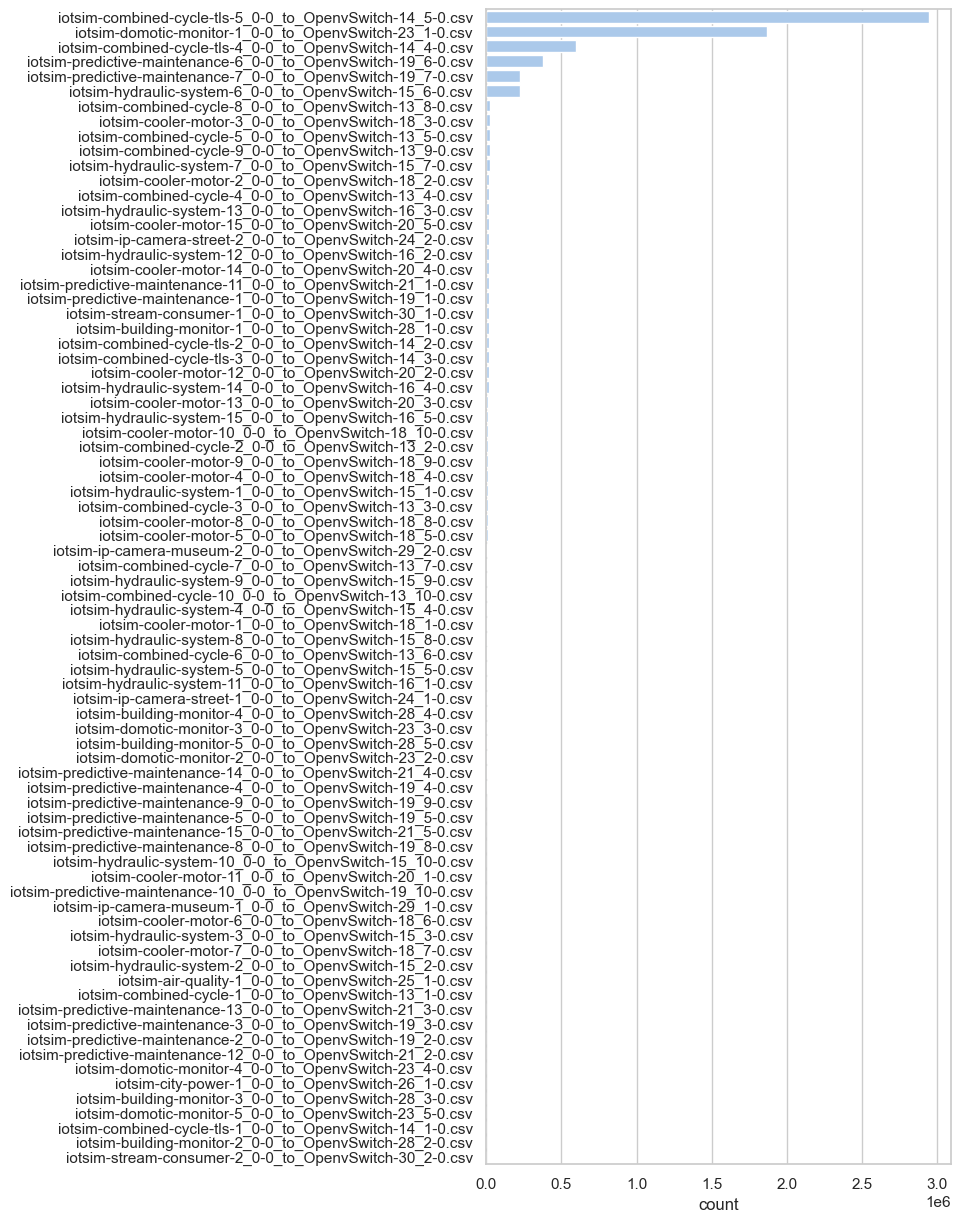

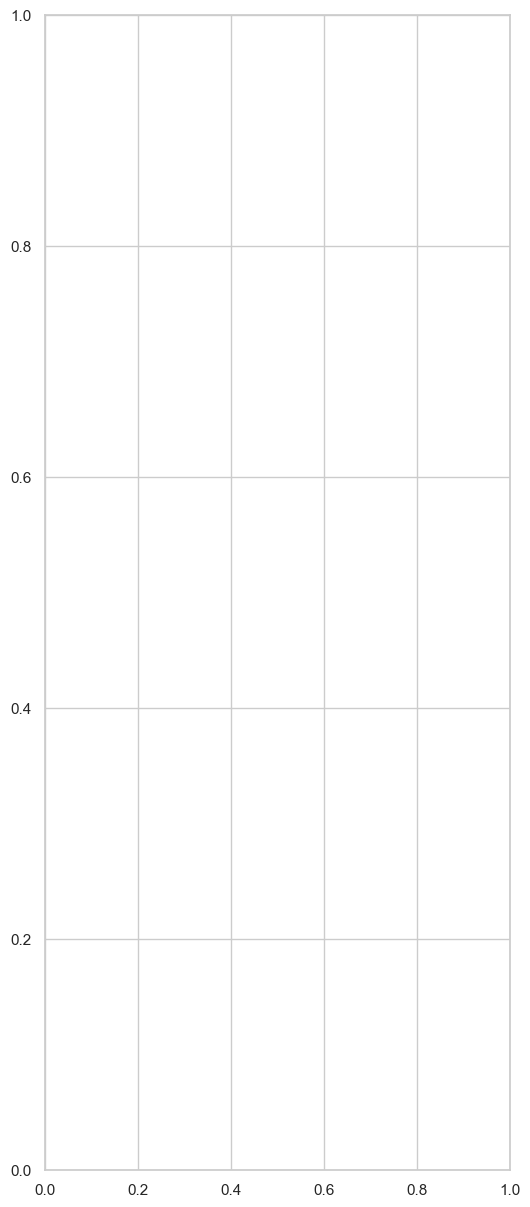

In [41]:
for label in df.label.unique():
    print(label)
    y = df.device.unique().tolist()
    x = df[df.label == label]['device'].value_counts()
    
    sns.set_theme(style="whitegrid")
    
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 15))
    
    # Plot the total crashes
    sns.set_color_codes("pastel")
    sns.barplot(x=x, y=y, color="b")

In [42]:
x

device
iotsim-building-monitor-1_0-0_to_OpenvSwitch-28_1-0.csv    68218
iotsim-ip-camera-museum-1_0-0_to_OpenvSwitch-29_1-0.csv    45849
iotsim-air-quality-1_0-0_to_OpenvSwitch-25_1-0.csv         39290
iotsim-combined-cycle-1_0-0_to_OpenvSwitch-13_1-0.csv      38246
iotsim-domotic-monitor-1_0-0_to_OpenvSwitch-23_1-0.csv     37393
iotsim-city-power-1_0-0_to_OpenvSwitch-26_1-0.csv          36405
iotsim-ip-camera-street-1_0-0_to_OpenvSwitch-24_1-0.csv    33720
iotsim-combined-cycle-10_0-0_to_OpenvSwitch-13_10-0.csv      818
Name: count, dtype: int64

In [40]:
df

,frame.number,frame.time,eth.src,eth.dst,ip.src,ip.dst,ip.proto,tcp.srcport,tcp.dstport,tcp.flags,label,device
144,145,"Jul 4, 2022 06:48:13.228749000 BST",0c:db:28:18:00:00,2e:b2:4c:22:9b:ef,192.168.4.3,192.168.20.24,1.0,NaN,NaN,NaN,Normal,iotsim-combined-cycle-tls-5_0-0_to_OpenvSwitch...
145,146,"Jul 4, 2022 06:48:13.230589000 BST",2e:b2:4c:22:9b:ef,0c:db:28:18:00:00,192.168.20.24,192.168.4.3,1.0,NaN,NaN,NaN,Normal,iotsim-combined-cycle-tls-5_0-0_to_OpenvSwitch...
146,147,"Jul 4, 2022 06:48:13.433172000 BST",0c:db:28:18:00:00,2e:b2:4c:22:9b:ef,192.168.4.3,192.168.20.24,17.0,NaN,NaN,NaN,Normal,iotsim-combined-cycle-tls-5_0-0_to_OpenvSwitch...
147,148,"Jul 4, 2022 06:48:13.434788000 BST",2e:b2:4c:22:9b:ef,0c:db:28:18:00:00,192.168.20.24,192.168.4.3,17.0,NaN,NaN,NaN,Normal,iotsim-combined-cycle-tls-5_0-0_to_OpenvSwitch...
183,184,"Jul 4, 2022 06:48:31.458976000 BST",0c:db:28:18:00:00,2e:b2:4c:22:9b:ef,192.168.4.3,192.168.20.24,17.0,NaN,NaN,NaN,Normal,iotsim-combined-cycle-tls-5_0-0_to_OpenvSwitch...
...,...,...,...,...,...,...,...,...,...,...,...,...
224149,224150,"Jul 4, 2022 07:49:10.071738000 BST",be:c3:90:c9:1f:5c,0c:71:11:6a:00:00,192.168.17.18,192.168.1.2,1.0,NaN,NaN,NaN,Normal,iotsim-stream-consumer-2_0-0_to_OpenvSwitch-30...
224150,224151,"Jul 4, 2022 07:49:10.073720000 BST",0c:71:11:6a:00:00,be:c3:90:c9:1f:5c,192.168.1.2,192.168.17.18,6.0,8554.0,40060.0,0x0018,Normal,iotsim-stream-consumer-2_0-0_to_OpenvSwitch-30...
224151,224152,"Jul 4, 2022 07:49:10.073883000 BST",be:c3:90:c9:1f:5c,0c:71:11:6a:00:00,192.168.17.18,192.168.1.2,6.0,40060.0,8554.0,0x0004,Normal,iotsim-stream-consumer-2_0-0_to_OpenvSwitch-30...
224152,224153,"Jul 4, 2022 07:49:10.073911000 BST",0c:71:11:6a:00:00,be:c3:90:c9:1f:5c,192.168.1.2,192.168.17.18,6.0,8554.0,40060.0,0x0011,Normal,iotsim-stream-consumer-2_0-0_to_OpenvSwitch-30...
